In [25]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('/Users/walu/lle_25/RE03/build')

In [123]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def convert_to_csv(input_file, output_file):
    header = ["iX", "iY", "iZ", "dose", "total_val_squared", "entry"]
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(header)
        for line in infile:
            if line.startswith('#') or line.strip() == '':
                continue
            values = [v.strip() for v in line.strip().split(',')]
            writer.writerow(values)

def plot_phantom_dose_by_particle(phantom_index, n_primaries=5e5):
    base_path = f'phantom_2_output/phantom{phantom_index}'

    particle_types = {
        "Electron": "dDepElectron.txt",
        "Proton": "dDepProton.txt",
        "Neutron": "dDepNeutron.txt",
        "Gamma": "dDepGamma.txt",
        "Alpha": "dDepAlpha.txt",
        "Muon Plus": "dDepMuonPlus.txt",
        "Muon Minus": "dDepMuonMinus.txt"
    }

    quality_factors = {
        "Electron": 1,
        "Gamma": 1,
        "Alpha": 20,
        "Neutron": 10,
        "Proton": 10,
        "Muon Plus": 10,
        "Muon Minus": 10
    }

    particle_colors = {
        "Electron": "#1f77b4",
        "Proton": "#ff7f0e",
        "Neutron": "#2ca02c",
        "Gamma": "#d62728",
        "Alpha": "#9467bd",
        "Muon Plus": "#8c564b",
        "Muon Minus": "#e377c2"
    }

    dose_equiv_rem = {}
    dose_uncertainty_rem = {}
    total_dose = 0

    for particle, filename in particle_types.items():
        txt_path = os.path.join(base_path, filename)
        csv_path = txt_path.replace('.txt', '.csv')
        convert_to_csv(txt_path, csv_path)
        df = pd.read_csv(csv_path)

        total_dose_gy = df['dose'].astype(float).sum()
        total_val_squared = df['total_val_squared'].astype(float)
        voxel_uncertainties_squared = total_val_squared / n_primaries
        total_dose_uncertainty_gy = np.sqrt(voxel_uncertainties_squared.sum())

        q_factor = quality_factors[particle]
        conversion_factor = 100 * q_factor * 1.56e8 * 1e6 * (1 / n_primaries)

        total_dose_rem = total_dose_gy * conversion_factor
        total_uncertainty_rem = total_dose_uncertainty_gy * conversion_factor

        dose_equiv_rem[particle] = total_dose_rem
        dose_uncertainty_rem[particle] = total_uncertainty_rem
        total_dose += total_dose_rem

        print(f"Total dose equivalent for {particle.lower()} in phantom{phantom_index}: "
              f"{total_dose_rem} ± {total_uncertainty_rem} microrem per shot")

    particles = list(dose_equiv_rem.keys())
    doses_rem = [dose_equiv_rem[p] for p in particles]
    errors_rem = [dose_uncertainty_rem[p] for p in particles]
    colors = [particle_colors[p] for p in particles]

    print(f"\nTotal dose for phantom {phantom_index}: {total_dose} microrem per shot")

    plt.figure(figsize=(10, 6))
    bars = plt.barh(particles, doses_rem, xerr=errors_rem, color=colors, capsize=5)
    plt.xlabel("Dose Equivalent (micro rem per shot)")
    plt.title(f"Dose Equivalent by Particle Type for Phantom {phantom_index}")
    plt.xscale('log')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Add total dose text box
    plt.text(
        0.95, 0.02,
        f"Total Dose: {total_dose:.4f} µrem/shot",
        transform=plt.gca().transAxes,
        fontsize=11,
        ha='right',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='gray', alpha=0.9)
    )

    plt.show()


Total dose equivalent for electron in phantom1: 0.00038443506990853163 ± 2.8015226822441995e-07 microrem per shot
Total dose equivalent for proton in phantom1: 0.007874466073694679 ± 6.360591920561096e-06 microrem per shot
Total dose equivalent for neutron in phantom1: 2.4341535638610014e-05 ± 1.1406950025676217e-08 microrem per shot
Total dose equivalent for gamma in phantom1: 1.802978088232968e-08 ± 8.921435884052205e-12 microrem per shot
Total dose equivalent for alpha in phantom1: 0.0013264325983154165 ± 1.4827483744896536e-06 microrem per shot
Total dose equivalent for muon plus in phantom1: 0.0017503782980099235 ± 2.475408728329169e-06 microrem per shot
Total dose equivalent for muon minus in phantom1: 0.003019069919867056 ± 3.0748505696296946e-06 microrem per shot

Total dose for phantom 1: 0.014379141525215099 microrem per shot


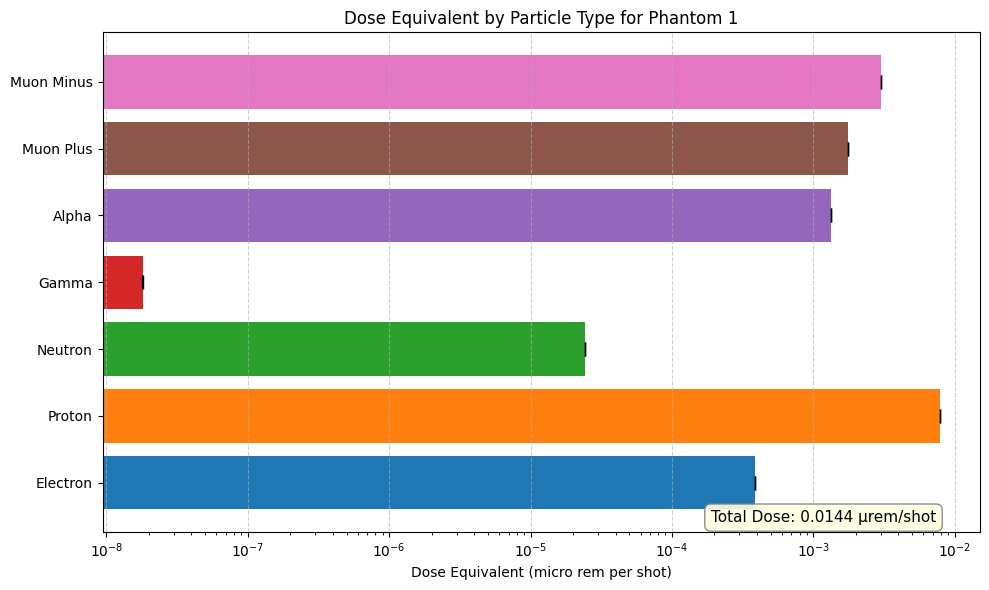

In [124]:
plot_phantom_dose_by_particle(1)


Total dose equivalent for electron in phantom2: 0.00030013425433253254 ± 1.2688892355210323e-07 microrem per shot
Total dose equivalent for proton in phantom2: 0.0118723502911159 ± 5.464986596647719e-06 microrem per shot
Total dose equivalent for neutron in phantom2: 4.7871926811777995e-05 ± 1.946466759786889e-08 microrem per shot
Total dose equivalent for gamma in phantom2: 5.401190584619956e-08 ± 1.6104515715514022e-11 microrem per shot
Total dose equivalent for alpha in phantom2: 0.0012963960017031068 ± 1.0342474003334023e-06 microrem per shot
Total dose equivalent for muon plus in phantom2: 0.0 ± 0.0 microrem per shot
Total dose equivalent for muon minus in phantom2: 0.0 ± 0.0 microrem per shot

Total dose for phantom 2: 0.013516806485869164 microrem per shot


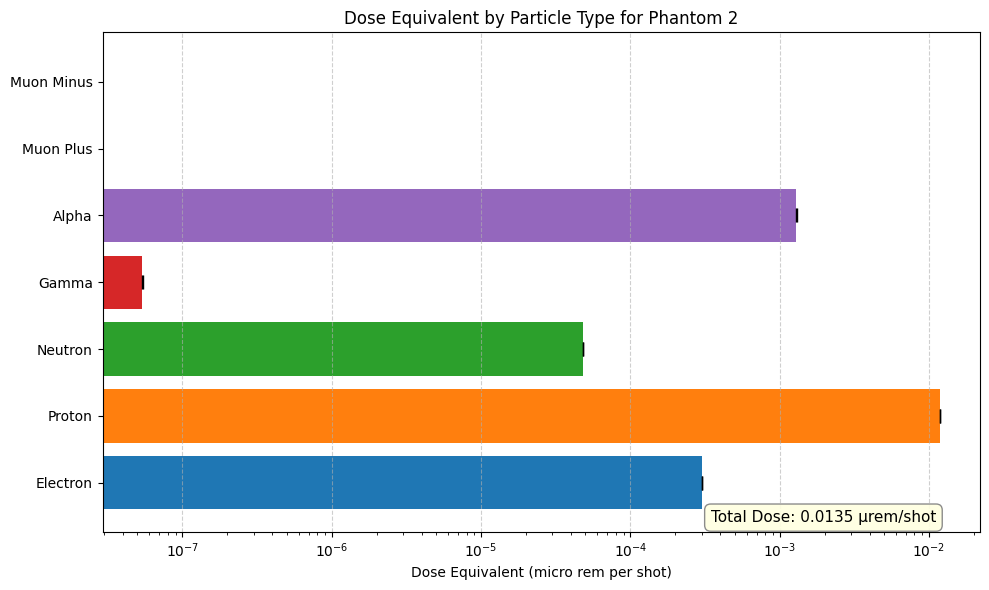

In [125]:
plot_phantom_dose_by_particle(2)


Total dose equivalent for electron in phantom3: 0.00030939664105599066 ± 1.4145449931442236e-07 microrem per shot
Total dose equivalent for proton in phantom3: 0.005549698924954714 ± 5.270217266136131e-06 microrem per shot
Total dose equivalent for neutron in phantom3: 2.4788508693215162e-05 ± 1.1758391807211107e-08 microrem per shot
Total dose equivalent for gamma in phantom3: 4.0316343803325566e-08 ± 1.7303751991681192e-11 microrem per shot
Total dose equivalent for alpha in phantom3: 0.00018720849311062654 ± 2.647527899484781e-07 microrem per shot
Total dose equivalent for muon plus in phantom3: 0.0 ± 0.0 microrem per shot
Total dose equivalent for muon minus in phantom3: 0.0 ± 0.0 microrem per shot

Total dose for phantom 3: 0.00607113288415835 microrem per shot


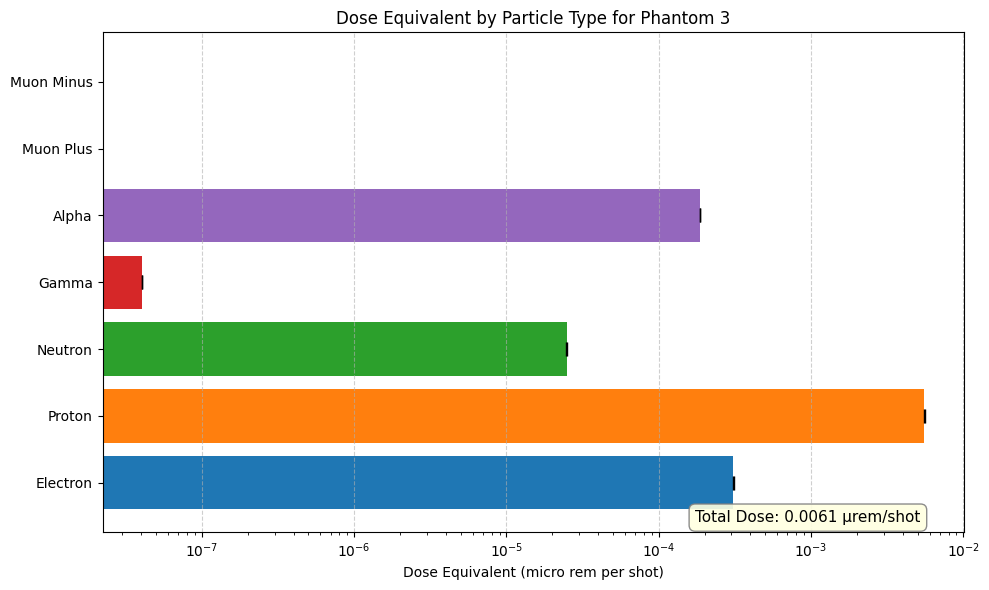

In [126]:
plot_phantom_dose_by_particle(3)


Total dose equivalent for electron in phantom4: 3.619887560938936e-07 ± 5.119294082945507e-10 microrem per shot
Total dose equivalent for proton in phantom4: 0.0035074592236877173 ± 3.846532557494395e-06 microrem per shot
Total dose equivalent for neutron in phantom4: 2.8551027414186385e-06 ± 4.037725018882843e-09 microrem per shot
Total dose equivalent for gamma in phantom4: 0.0 ± 0.0 microrem per shot
Total dose equivalent for alpha in phantom4: 0.0 ± 0.0 microrem per shot
Total dose equivalent for muon plus in phantom4: 0.0 ± 0.0 microrem per shot
Total dose equivalent for muon minus in phantom4: 0.0 ± 0.0 microrem per shot

Total dose for phantom 4: 0.00351067631518523 microrem per shot


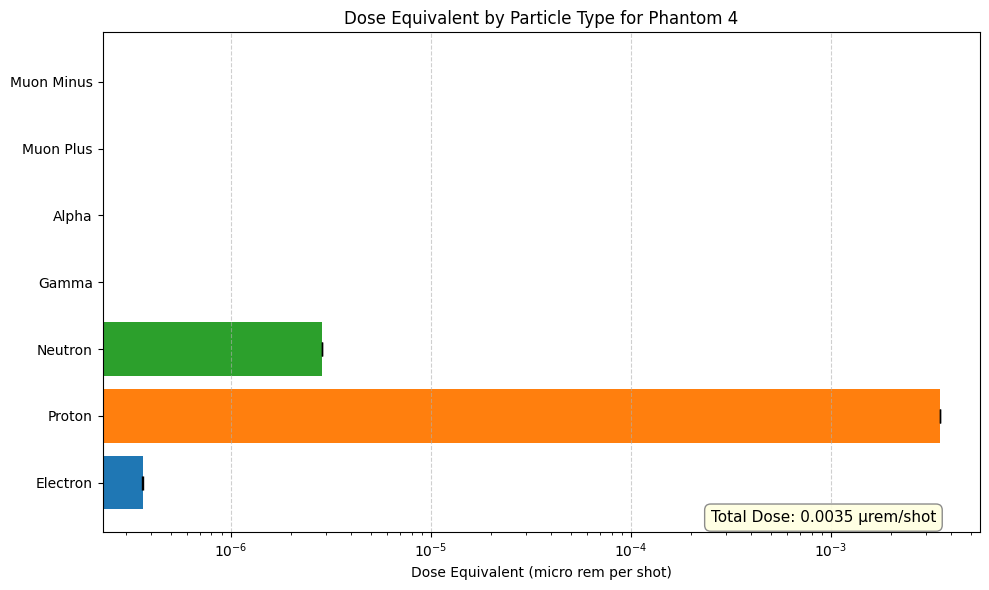

In [127]:
plot_phantom_dose_by_particle(4)


Total dose equivalent for electron in phantom5: 0.35024344156218956 ± 1.1008234790173821e-05 microrem per shot
Total dose equivalent for proton in phantom5: 0.6057055145992918 ± 0.0001132125595029547 microrem per shot
Total dose equivalent for neutron in phantom5: 0.026486522816690082 ± 2.36251148027013e-06 microrem per shot
Total dose equivalent for gamma in phantom5: 6.165445506018471e-05 ± 3.357435762661553e-09 microrem per shot
Total dose equivalent for alpha in phantom5: 0.4207234547922141 ± 0.00020967296946408125 microrem per shot
Total dose equivalent for muon plus in phantom5: 0.008385035592708201 ± 4.61396665376492e-06 microrem per shot
Total dose equivalent for muon minus in phantom5: 0.012998484168614712 ± 7.643551883916623e-06 microrem per shot

Total dose for phantom 5: 1.4246041079867688 microrem per shot


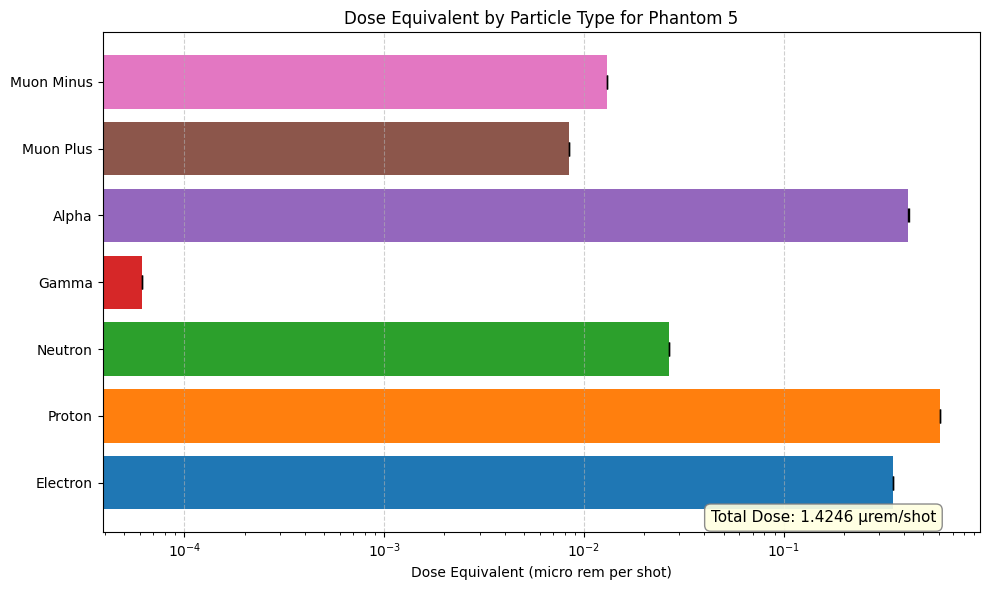

In [128]:
plot_phantom_dose_by_particle(5)


Total dose equivalent for electron in phantom6: 0.00020291255870517614 ± 2.215338601345978e-07 microrem per shot
Total dose equivalent for proton in phantom6: 0.004594014660470481 ± 3.6785994776119922e-06 microrem per shot
Total dose equivalent for neutron in phantom6: 1.7810228235036966e-05 ± 1.0343126180535594e-08 microrem per shot
Total dose equivalent for gamma in phantom6: 3.1879016995233996e-08 ± 2.3454321120194746e-11 microrem per shot
Total dose equivalent for alpha in phantom6: 0.0012548614701916976 ± 1.162298056614129e-06 microrem per shot
Total dose equivalent for muon plus in phantom6: 0.0 ± 0.0 microrem per shot
Total dose equivalent for muon minus in phantom6: 0.0 ± 0.0 microrem per shot

Total dose for phantom 6: 0.006069630796619387 microrem per shot


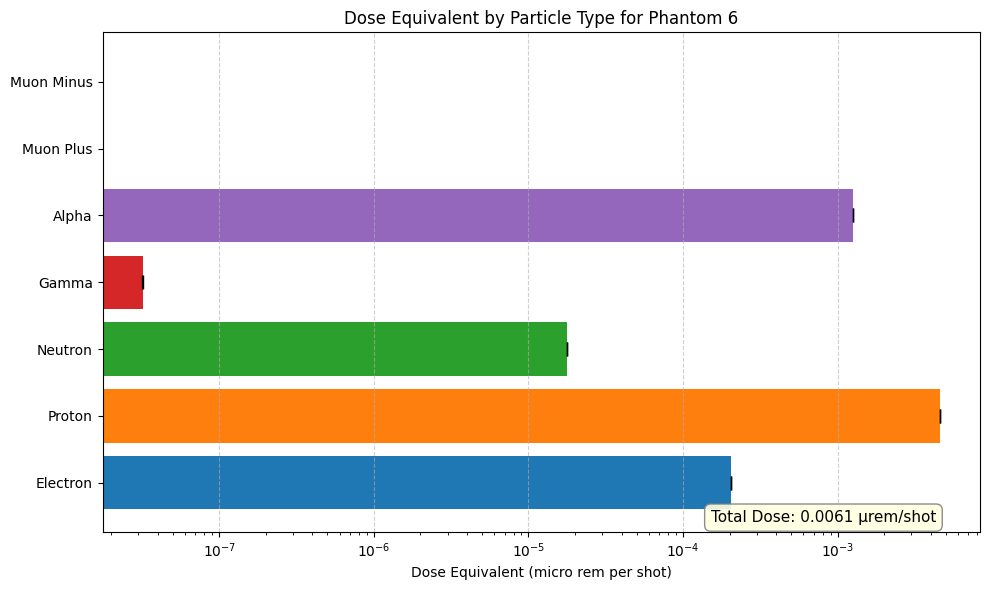

In [129]:
plot_phantom_dose_by_particle(6)


Total dose equivalent for electron in phantom7: 3.444401492079092e-05 ± 4.145195422181785e-08 microrem per shot
Total dose equivalent for proton in phantom7: 0.00031980182351599187 ± 4.522680760879628e-07 microrem per shot
Total dose equivalent for neutron in phantom7: 2.638082911386937e-06 ± 3.730812631948106e-09 microrem per shot
Total dose equivalent for gamma in phantom7: 1.4861919592216632e-09 ± 2.101792825021118e-12 microrem per shot
Total dose equivalent for alpha in phantom7: 0.0012846380973178051 ± 1.8167526199680086e-06 microrem per shot
Total dose equivalent for muon plus in phantom7: 0.0 ± 0.0 microrem per shot
Total dose equivalent for muon minus in phantom7: 0.0 ± 0.0 microrem per shot

Total dose for phantom 7: 0.001641523504857934 microrem per shot


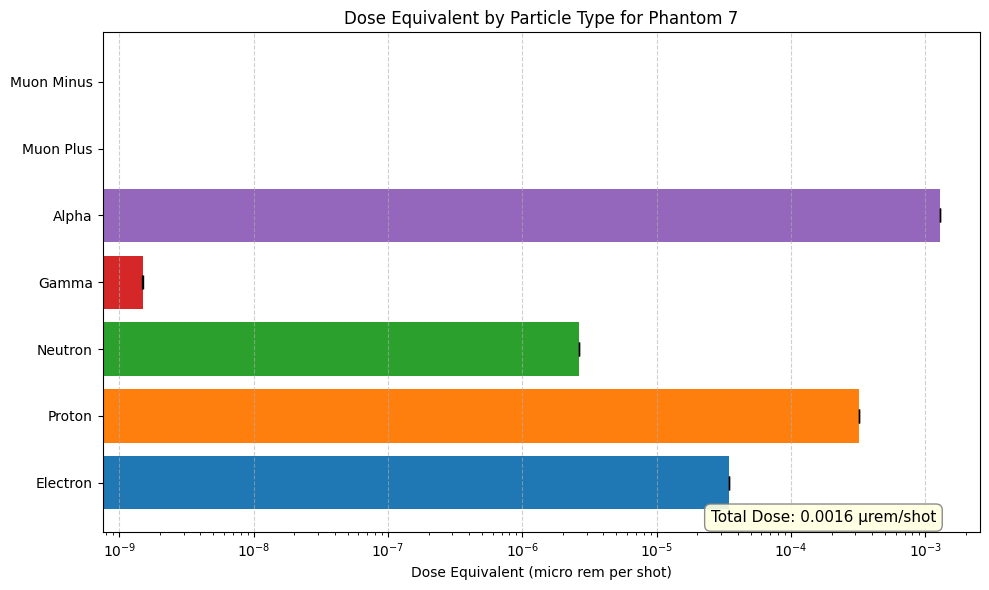

In [130]:
plot_phantom_dose_by_particle(7)


In [131]:
three_layers = [0.06888059086463627,  0.012193413966874475, 0.010590229917247477, 7.645258165994073e-07, 
               0.928226831061926,  0.042731650000751645, 0.0004049193084931214]

In [114]:
four_layers = [0.014379141525215099, 0.013516806485869164, 0.00607113288415835, 
               0.00351067631518523, 1.4246041079867688, 0.006069630796619387, 0.001641523504857934]

In [133]:
five_layers = [0.010858543147690298, 0.01058667283332836, 0.013022780756027518, 
               6.57016835501908e-06, 2.8684866308869763, 8.988582950546831e-05, 
               0.002066210074487335]

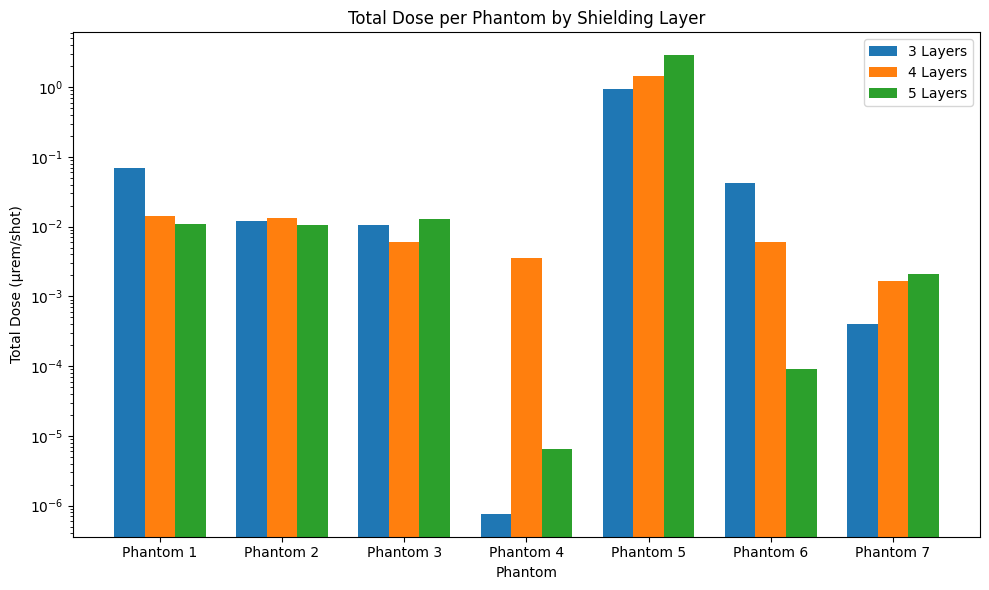

In [135]:


phantom_labels = [f'Phantom {i+1}' for i in range(7)]

x = np.arange(len(phantom_labels))  # positions for each phantom
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars side by side
ax.bar(x - width, three_layers, width, label='3 Layers')
ax.bar(x,         four_layers,  width, label='4 Layers')
ax.bar(x + width, five_layers,  width, label='5 Layers')

# Labels and title
ax.set_xlabel('Phantom')
ax.set_ylabel('Total Dose (μrem/shot)')
ax.set_title('Total Dose per Phantom by Shielding Layer')
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(phantom_labels)
ax.legend()

plt.tight_layout()
plt.show()
